<a href="https://colab.research.google.com/github/Smrt-Sanskar/CS671/blob/main/MLFFNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Group03.zip

Archive:  /content/drive/MyDrive/Group03.zip
   creating: Group03/
   creating: Group03/Classification/
   creating: Group03/Classification/Image_Group03/
   creating: Group03/Classification/Image_Group03/test/
   creating: Group03/Classification/Image_Group03/test/botanical_garden/
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaestfykdspfjxqz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aajgmzsvuhejexcq.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaqfmkvdwukffrst.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acbeefkxpymwevpk.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acghfkorvlqvksjz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackdwnmnaehpqggg.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackzydggopidfvhd.jpg  
  inflating: Group03/Cl

In [ ]:
class MLFFNN(object):

    def __init__(self, input, hidden, output):

        self.input = input
        self.hidden = hidden
        self.output = output

        layers = [input] + hidden + [output]

        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        deriv = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            deriv.append(d)
        self.deriv = deriv

        activ = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activ.append(a)
        self.activ = activ


    def forward_propagate(self, input):

        activ = input
        self.activ[0] = activ
        net_input = []

        for i, w in enumerate(self.weights):
            net_input = np.dot(activ, w)
            activ = self._sigmoid(net_input)
            self.activ[i + 1] = activ

        return net_input;

    def back_propagate(self, error):

        for i in reversed(range(len(self.deriv))):

            activ = self.activ[i + 1]
            delta = error * self._sigmoid_derivative(activ)

            delta_new = delta.reshape(delta.shape[0], -1).T

            current_activ = self.activ[i]

            current_activ = current_activ.reshape(current_activ.shape[0],-1)

            self.deriv[i] = np.dot(current_activ, delta_new)

            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
 
        avg_error = [0 for i in range(epochs)]
        for i in range(epochs):

            sum = 0

            for j, input in enumerate(inputs):
                target = targets[j]

                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                self.gradient_descent(learning_rate)

                sum += self._mse(target, output)

            avg_error[i] = sum / len(targets)
            print("Error: {} at epoch {}".format(sum / len(targets), i + 1))

        print("Training complete!")
        print("=====")

        return avg_error


    def gradient_descent(self, learningRate = 1):

        for i in range(len(self.weights)):
            weights = self.weights[i]
            deriv = self.deriv[i]
            weights += deriv * learningRate

    def _sigmoid(self, x):

        y = 1.0 / (1 + np.exp(-x))
        return y

    def _sigmoid_derivative(self, x):
       
        return x * (1.0 - x)        

    def _mse(self, target, output):

        return np.average((target - output) ** 2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data1 = pd.read_csv('Group03/Regression/UnivariateData/3.csv', header = None)
data2 = pd.read_csv('Group03/Regression/BivariateData/3.csv', header = None)

In [ ]:
n = len(data1)
m = len(data2)
train1x = data1[0 : int(0.6 * n)][0]
train1y = data1[0 : int(0.6 * n)][1]
val1x = data1[int(0.6 * n) : int(0.8 * n)][0]
val1y = data1[int(0.6 * n) : int(0.8 * n)][1]
test1x = data1[int(0.8 * n) : n][0]
test1y = data1[int(0.8 * n) : n][1]

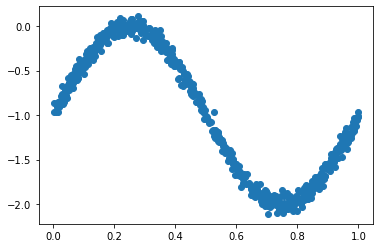

In [ ]:
plt.scatter(train1x, train1y)

In [ ]:
train1x = np.array(train1x).reshape(train1x.shape[0], 1)
train1y = np.array(train1y).reshape(train1y.shape[0], 1)
val1x = np.array(val1x).reshape(val1x.shape[0], 1)
val1y = np.array(val1y).reshape(val1y.shape[0], 1)
test1x = np.array(test1x).reshape(test1x.shape[0], 1)
test1y = np.array(test1y).reshape(test1y.shape[0], 1)
model1 = MLFFNN(2, [5], 1)
model2 = MLFFNN(2, [5, 5], 1)
model3 = MLFFNN(2, [10], 1)
model4 = MLFFNN(2, [10, 10], 1)

In [ ]:
temp1 = np.ones(shape = (train1x.shape[0], 1))
temp2 = np.ones(shape = (val1x.shape[0], 1))
temp3 = np.ones(shape = (test1x.shape[0], 1))
train1x = np.concatenate([train1x, temp1], axis = 1)
val1x = np.concatenate([val1x, temp2], axis = 1)
test1x = np.concatenate([test1x, temp3], axis = 1)
error1 = model1.train(train1x, train1y, 10000, 0.01)
error2 = model2.train(train1x, train1y, 10000, 0.01)
error3 = model3.train(train1x, train1y, 10000, 0.01)
error4 = model4.train(train1x, train1y, 10000, 0.01)

Streaming output truncated to the last 5000 lines.
Error: 0.003533304442166522 at epoch 5003
Error: 0.003532567837542977 at epoch 5004
Error: 0.0035318327797874316 at epoch 5005
Error: 0.00353109926553319 at epoch 5006
Error: 0.003530367291420837 at epoch 5007
Error: 0.0035296368540981868 at epoch 5008
Error: 0.0035289079502203945 at epoch 5009
Error: 0.0035281805764497865 at epoch 5010
Error: 0.0035274547294558574 at epoch 5011
Error: 0.003526730405915399 at epoch 5012
Error: 0.0035260076025124347 at epoch 5013
Error: 0.0035252863159379987 at epoch 5014
Error: 0.003524566542890451 at epoch 5015
Error: 0.003523848280075218 at epoch 5016
Error: 0.003523131524204879 at epoch 5017
Error: 0.003522416271999094 at epoch 5018
Error: 0.0035217025201846885 at epoch 5019
Error: 0.0035209902654955603 at epoch 5020
Error: 0.0035202795046726586 at epoch 5021
Error: 0.003519570234464009 at epoch 5022
Error: 0.003518862451624703 at epoch 5023
Error: 0.003518156152916806 at epoch 5024
Error: 0.0035174

Text(0, 0.5, 'average error')

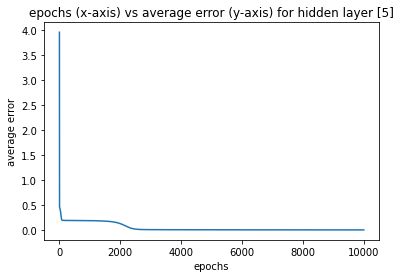

In [ ]:
plt.plot([i for i in range(1,10001)], error1) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [5]") 
plt.xlabel("epochs")
plt.ylabel("average error")

Text(0, 0.5, 'average error')

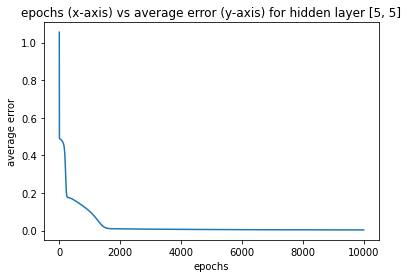

In [ ]:
plt.plot([i for i in range(1,10001)], error2) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [5, 5]") 
plt.xlabel("epochs")
plt.ylabel("average error")

Text(0, 0.5, 'average error')

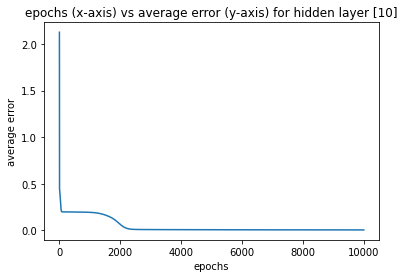

In [ ]:
plt.plot([i for i in range(1,10001)], error3) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [10]") 
plt.xlabel("epochs")
plt.ylabel("average error")

Text(0, 0.5, 'average error')

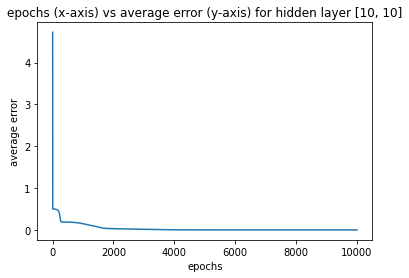

In [ ]:
plt.plot([i for i in range(1,10001)], error4) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [10, 10]") 
plt.xlabel("epochs")
plt.ylabel("average error")

In [ ]:
output1 = []
sum1 = 0
output2 = []
sum2 = 0
output3 = []
sum3 = 0
for i in range (len(train1x)):
  out = model4.forward_propagate(train1x[i])
  output1.append(out)
  sum1 += model4._mse(train1y[i], out)
for i in range (len(val1x)):
  out = model4.forward_propagate(val1x[i])
  output2.append(out)
  sum2 += model4._mse(val1y[i], out)
for i in range (len(test1x)):
  out = model4.forward_propagate(test1x[i])
  output3.append(out)
  sum3 += model4._mse(test1y[i], out)   
print(sum1 / len(train1x))
print(sum2 / len(val1x))
print(sum3 / len(test1x))

0.0030841127502746514
0.0026074466044992916
0.0031773489555352342


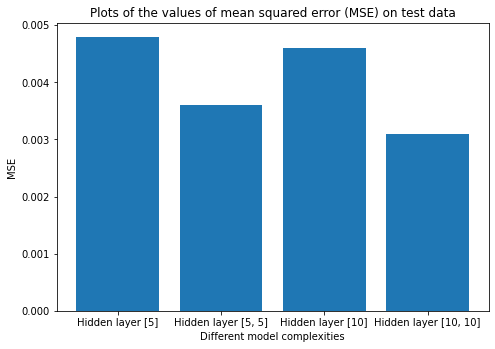

In [ ]:
# "[5],[10],[5,5],[10,10]"
train = [0.0051,0.0037,0.0049,0.0030]
val = [0.0049,0.0034,0.0047,0.0026]
test = [0.0048,0.0036,0.0046,0.0031]
name = ["Hidden layer [5]", "Hidden layer [5, 5]", "Hidden layer [10]", "Hidden layer [10, 10]"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name,test)
plt.title("Plots of the values of mean squared error (MSE) on test data")
plt.xlabel("Different model complexities")
plt.ylabel("MSE")
plt.show()

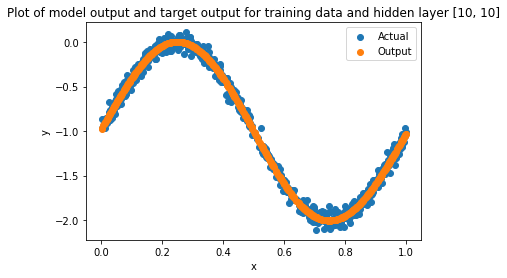

In [ ]:
output1 = []
for i in train1x:
  out = model4.forward_propagate(i)
  output1.append(out)
temp = []
for j in train1x: temp.append(j[0])  
plt.scatter(temp, train1y, label="Actual")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(temp, output1, label="Output")
plt.title("Plot of model output and target output for training data and hidden layer [10, 10]")
plt.legend()

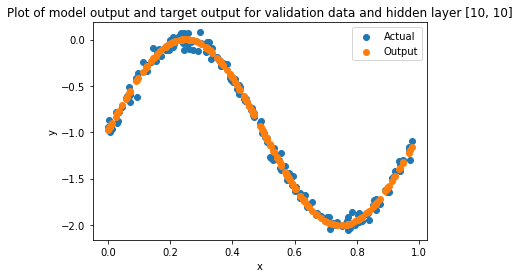

In [ ]:
output2 = []
for i in val1x:
  out = model4.forward_propagate(i)
  output2.append(out)
temp = []
for j in val1x: temp.append(j[0])   
plt.scatter(temp, val1y, label="Actual")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(temp, output2, label="Output")
plt.title("Plot of model output and target output for validation data and hidden layer [10, 10]")
plt.legend()

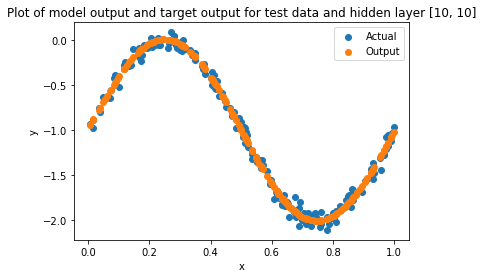

In [ ]:
output3 = []
for i in test1x:
  out = model4.forward_propagate(i)
  output3.append(out)
temp = []
for j in test1x: temp.append(j[0])   
plt.scatter(temp, test1y, label="Actual")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(temp, output3, label="Output")
plt.title("Plot of model output and target output for test data and hidden layer [10, 10]")
plt.legend()

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on training data for hidden layer [10, 10].')

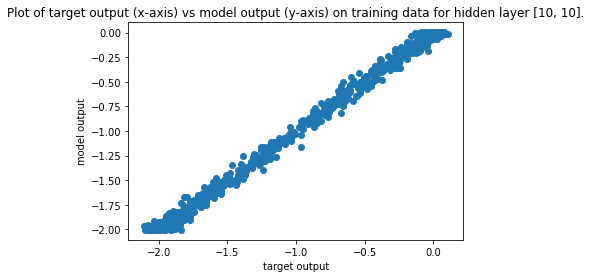

In [ ]:
plt.scatter(train1y, output1)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on training data for hidden layer [10, 10].")

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on validation data for hidden layer [10, 10].')

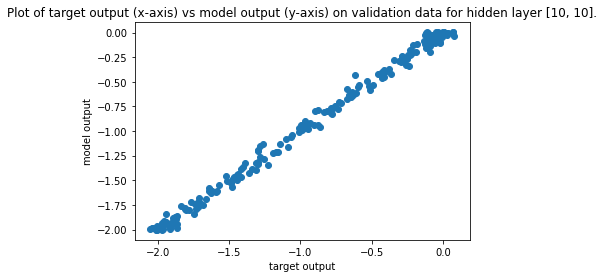

In [ ]:
plt.scatter(val1y, output2)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on validation data for hidden layer [10, 10].")

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on test data for hidden layer [10, 10].')

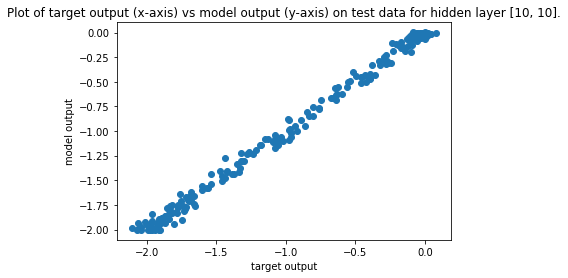

In [ ]:
plt.scatter(test1y, output3)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on test data for hidden layer [10, 10].")

In [ ]:
train2x = data2[0 : int(0.6 * m)][0]
train2y = data2[0 : int(0.6 * m)][1]
train2z = data2[0 : int(0.6 * m)][2]
val2x = data2[int(0.6 * m) : int(0.8 * m)][0]
val2y = data2[int(0.6 * m) : int(0.8 * m)][1]
val2z = data2[int(0.6 * m) : int(0.8 * m)][2]
test2x = data2[int(0.8 * m) : m][0]
test2y = data2[int(0.8 * m) : m][1]
test2z = data2[int(0.8 * m) : m][2]

In [ ]:
train2x = np.array(train2x).reshape(train2x.shape[0], 1)
train2y = np.array(train2y).reshape(train2y.shape[0], 1)
train2z = np.array(train2z).reshape(train2z.shape[0], 1)
val2x = np.array(val2x).reshape(val2x.shape[0], 1)
val2y = np.array(val2y).reshape(val2y.shape[0], 1)
val2z = np.array(val2z).reshape(val2z.shape[0], 1)
test2x = np.array(test2x).reshape(test2x.shape[0], 1)
test2y = np.array(test2y).reshape(test2y.shape[0], 1)
test2z = np.array(test2z).reshape(test2z.shape[0], 1)
model1 = MLFFNN(3, [5], 1)
model2 = MLFFNN(3, [5, 5], 1)
model3 = MLFFNN(3, [10], 1)
model4 = MLFFNN(3, [10, 10], 1)

In [ ]:
temp1 = np.ones(shape = (train2x.shape[0], 1))
temp2 = np.ones(shape = (val2x.shape[0], 1))
temp3 = np.ones(shape = (test2x.shape[0], 1))
train2x = np.concatenate([train2x, train2y, temp1], axis = 1)  
val2x = np.concatenate([val2x, val2y, temp2], axis = 1)   
test2x = np.concatenate([test2x, test2y, temp3], axis = 1)                         
error1 = model1.train(train2x, train2z, 1000, 0.01)
error2 = model2.train(train2x, train2z, 1000, 0.01)
error3 = model3.train(train2x, train2z, 1000, 0.01)
error4 = model4.train(train2x, train2z, 1000, 0.01)

Error: 1.8347300494189192 at epoch 1
Error: 1.3610149093657542 at epoch 2
Error: 1.1717201695372161 at epoch 3
Error: 0.9167307164323691 at epoch 4
Error: 0.6496361920700534 at epoch 5
Error: 0.44524198656290953 at epoch 6
Error: 0.3263086858683932 at epoch 7
Error: 0.26820883697368225 at epoch 8
Error: 0.24209618478770886 at epoch 9
Error: 0.2306087681097393 at epoch 10
Error: 0.22544972027586352 at epoch 11
Error: 0.22300495341208376 at epoch 12
Error: 0.22174879543234904 at epoch 13
Error: 0.22103566502898728 at epoch 14
Error: 0.2205853550609641 at epoch 15
Error: 0.2202708985703119 at epoch 16
Error: 0.22003148657230617 at epoch 17
Error: 0.2198361529329443 at epoch 18
Error: 0.2196681413231985 at epoch 19
Error: 0.21951786601037643 at epoch 20
Error: 0.21937956696621708 at epoch 21
Error: 0.21924962780377624 at epoch 22
Error: 0.2191256835965372 at epoch 23
Error: 0.219006125462825 at epoch 24
Error: 0.2188898150445847 at epoch 25
Error: 0.21877591498829402 at epoch 26
Error: 0.2

Text(0, 0.5, 'average error')

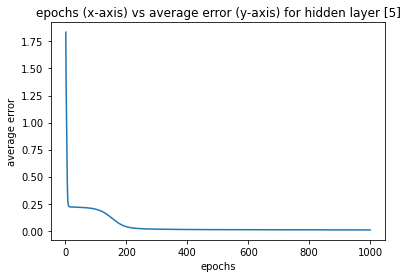

In [ ]:
plt.plot([i for i in range(1,1001)], error1) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [5]") 
plt.xlabel("epochs")
plt.ylabel("average error")

Text(0, 0.5, 'average error')

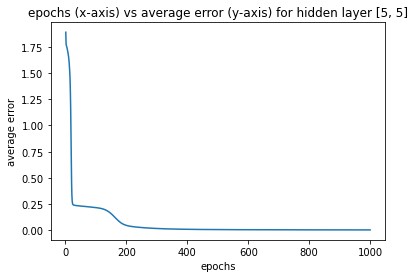

In [ ]:
plt.plot([i for i in range(1,1001)], error2) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [5, 5]") 
plt.xlabel("epochs")
plt.ylabel("average error")

Text(0, 0.5, 'average error')

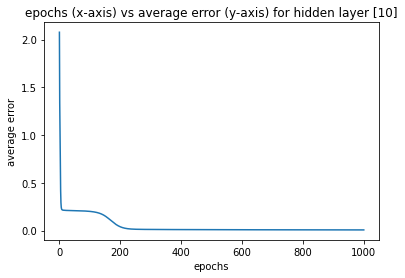

In [ ]:
plt.plot([i for i in range(1,1001)], error3) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [10]") 
plt.xlabel("epochs")
plt.ylabel("average error")

Text(0, 0.5, 'average error')

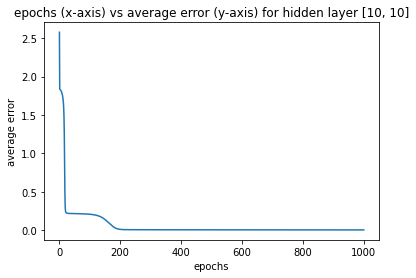

In [ ]:
plt.plot([i for i in range(1,1001)], error4) 
plt.title("epochs (x-axis) vs average error (y-axis) for hidden layer [10, 10]") 
plt.xlabel("epochs")
plt.ylabel("average error")

In [ ]:
output1 = []
sum1 = 0
output2 = []
sum2 = 0
output3 = []
sum3 = 0
for i in range (len(train2x)):
  out = model4.forward_propagate(train2x[i])
  output1.append(out)
  sum1 += model4._mse(train2z[i], out)
for i in range (len(val2x)):
  out = model4.forward_propagate(val2x[i])
  output2.append(out)
  sum2 += model4._mse(val2z[i], out)
for i in range (len(test2x)):
  out = model4.forward_propagate(test2x[i])
  output3.append(out)
  sum3 += model4._mse(test2z[i], out)   
print(sum1 / len(train2y))
print(sum2 / len(val2y))
print(sum3 / len(test2y))

0.004756244701504584
0.004704509391419967
0.004704436644637768


In [ ]:
# [[5], [5, 5], [10], [10, 10], [20], [20, 20]]
train = [0.0074,0.0055,0.0066,0.0047]
val = [0.0075,0.0053,0.0067,0.0047]
test = [0.0074,0.0055,0.0065,0.0047]

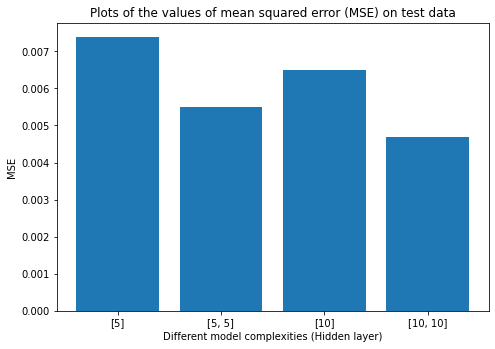

In [ ]:
name = ["[5]", "[5, 5]", "[10]", "[10, 10]"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name,test)
plt.title("Plots of the values of mean squared error (MSE) on test data")
plt.xlabel("Different model complexities (Hidden layer)")
plt.ylabel("MSE")
plt.show()

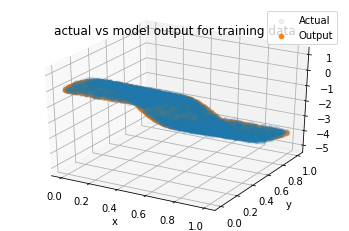

In [ ]:
output1 = []
for i in range(len(train2x)):
  output1.append(model4.forward_propagate(train2x[i]))
fig = plt.figure()
ax = plt.axes(projection='3d')
temp1 = []
temp2 = []
for i in range(len(train2x)):
  temp1.append(train2x[i][0])
  temp2.append(train2x[i][1])
ax.scatter3D(temp1, temp2, train2z, cmap='red', label="Actual", alpha = 0.1);
plt.xlabel('x')
plt.ylabel('y')
ax.scatter3D(temp1, temp2, output1, cmap='green', label="Output");
plt.title('2-dimensional (Bivariate) input data')  
plt.title("actual vs model output for training data")
plt.legend()

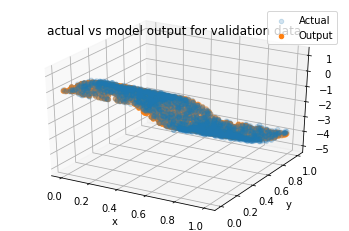

In [ ]:
output2 = []
for i in range(len(val2x)):
  output2.append(model4.forward_propagate(val2x[i]))
fig = plt.figure()
ax = plt.axes(projection='3d')
temp1 = []
temp2 = []
for i in range(len(val2x)):
  temp1.append(val2x[i][0])
  temp2.append(val2x[i][1])
ax.scatter3D(temp1, temp2, val2z, cmap='red', label="Actual", alpha = 0.2);
plt.xlabel('x')
plt.ylabel('y')
ax.scatter3D(temp1, temp2, output2, cmap='green', label="Output");
plt.title('2-dimensional (Bivariate) input data')  
plt.title("actual vs model output for validation data")
plt.legend()

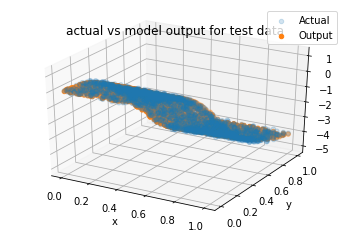

In [ ]:
output3 = []
for i in range(len(test2x)):
  output3.append(model4.forward_propagate(test2x[i]))
fig = plt.figure()
ax = plt.axes(projection='3d')
temp1 = []
temp2 = []
for i in range(len(test2x)):
  temp1.append(test2x[i][0])
  temp2.append(test2x[i][1])
ax.scatter3D(temp1, temp2, test2z, cmap='red', label="Actual", alpha = 0.2);
plt.xlabel('x')
plt.ylabel('y')
ax.scatter3D(temp1, temp2, output3, cmap='green', label="Output");
plt.title('2-dimensional (Bivariate) input data')  
plt.title("actual vs model output for test data")
plt.legend()

Text(0.5, 1.0, 'Model output vs target output on training data for hidden layer [10, 10].')

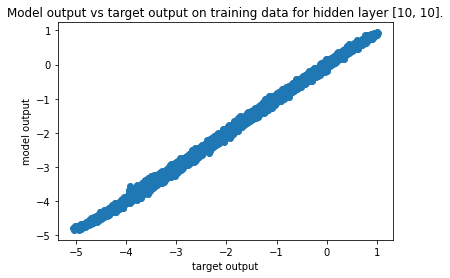

In [ ]:
plt.scatter(train2z, output1)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Model output vs target output on training data for hidden layer [10, 10].")

Text(0.5, 1.0, 'Model output vs target output on validation data for hidden layer [10, 10].')

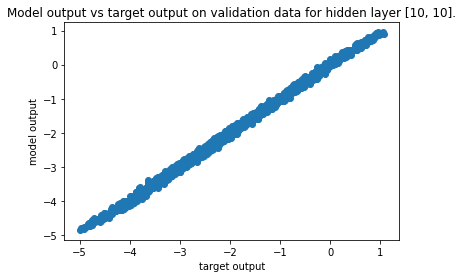

In [ ]:
plt.scatter(val2z, output2)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Model output vs target output on validation data for hidden layer [10, 10].")

Text(0.5, 1.0, 'Model output vs target output on test data for hidden layer [10, 10].')

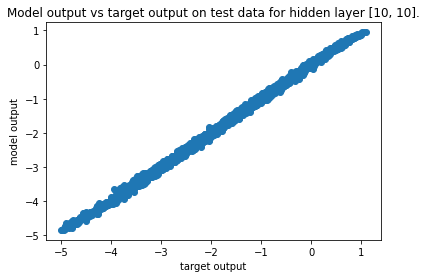

In [ ]:
plt.scatter(test2z, output3)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Model output vs target output on test data for hidden layer [10, 10].")